# Sales Analysis

### Import libraries

In [129]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt

### Merging 12 months of sales data into a single file

In [130]:

df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index= False)

#### Read in all data

In [131]:
### Read in all data
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up the Data

#### Drop rows of nan

In [132]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how='all')

#### Filter "Or" and delete

In [133]:
temp_df = all_data[all_data["Order Date"].str[0:2]== 'Or']
temp_df.head()
all_data = all_data.loc[all_data["Order Date"].str[0:2]!= 'Or']

##### Convert Columns to Correct Type

In [134]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])


### Augement Data with additional columns

##### Adding month column

In [135]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data["Month"] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding Sales

In [136]:
all_data["Sales"] = all_data["Price Each"].astype('float') * all_data["Quantity Ordered"].astype('int')

##### Add city column

In [137]:
# using .apply()
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Best month for sales? How much earned?


In [138]:
results = all_data.groupby("Month").sum()

<function matplotlib.pyplot.show(close=None, block=None)>

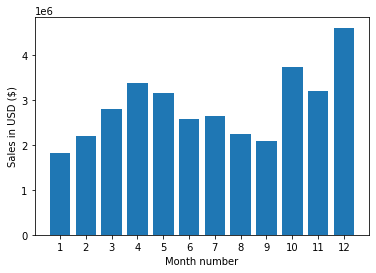

In [139]:
months = range(1,13)
plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show

### What City has the highest number of sales?

<function matplotlib.pyplot.show(close=None, block=None)>

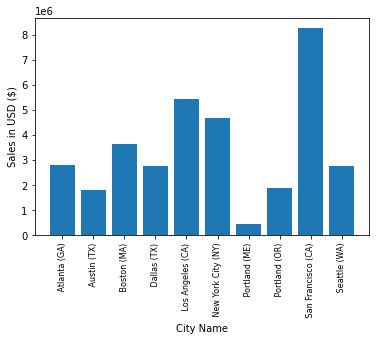

In [140]:
results = all_data.groupby("City").sum()
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation ="vertical", size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show

### What  time to display advertisements to maximize likelihood of customers buying a product?

In [141]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


<function matplotlib.pyplot.show(close=None, block=None)>

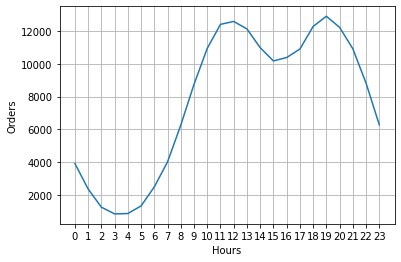

In [142]:
counts = all_data.groupby(["Hour"]).count()
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, counts["Sales"])
plt.ylabel("Orders")
plt.xlabel("Hours")
plt.xticks(hours)
plt.grid()
plt.show

### What products are most often sold together?

In [143]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
df = df[["Order ID", "Grouped"]].drop_duplicates()
df=df.dropna()

C:\Users\rchap\AppData\Local\Temp\ipykernel_328\952254759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


In [144]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What product sold the most?

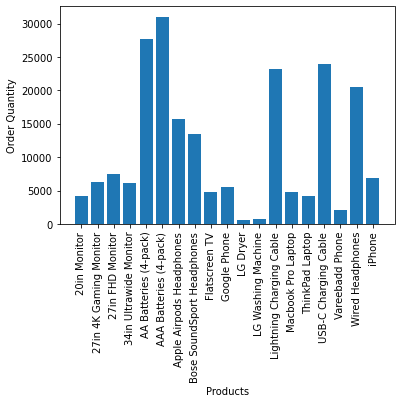

In [148]:
product_group = all_data.groupby('Product')
products = [product for product, df in product_group]
plt.bar(products, product_group.sum()["Quantity Ordered"])
plt.ylabel("Order Quantity")
plt.xlabel("Products")
plt.xticks(products, rotation="vertical")
plt.show()